# Image Preprocessing Techniques
In this notebook, we will show and explain different image preprocessing techniques using the Python Image Library (PIL) on a jpg image called 'flower.jpg'.

In [10]:
# Import necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np

## Loading the Image
First, we need to load our image using PIL's Image module. 

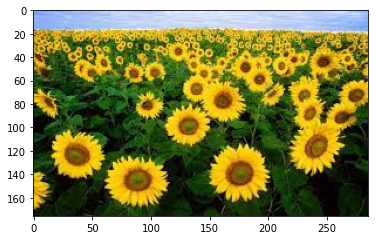

In [2]:
# Open an image file
img = Image.open('flower.jpeg')
plt.imshow(img)
plt.show()

This is our original image which we will be using for all further transformations.

## Resizing
Resizing is a common preprocessing step in image processing. It is used to change the dimensions (width and height) of the image. Here we resize the image to 200x200 pixels.

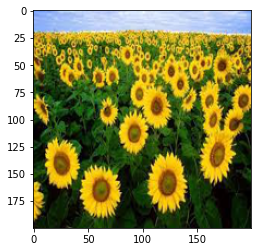

In [3]:
# Resize the image
resized_img = img.resize((200, 200))
plt.imshow(resized_img)
plt.show()

The resized image has the same aspect ratio as the original, but is now 200 pixels in both dimensions.

## Rotation
Rotating an image is another common preprocessing step. This transformation is used when the model needs to be invariant to the rotation of the input images. Here we rotate the image by 45 degrees.

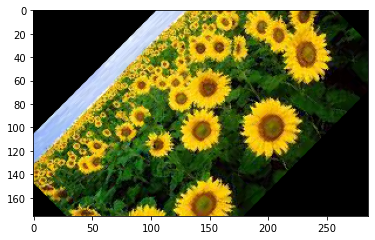

In [4]:
# Rotate the image
rotated_img = img.rotate(45)
plt.imshow(rotated_img)
plt.show()

The image has been rotated by 45 degrees counter-clockwise. The corners of the original image, now outside the image boundary, are filled with black color.

## Flipping
Flipping an image horizontally or vertically can be useful in certain situations, especially when training neural networks, as it can create additional training data. Here, we flip the image horizontally.

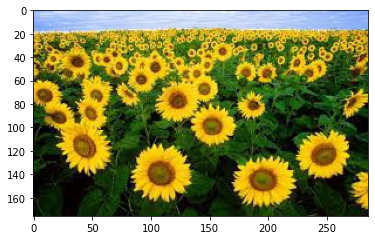

In [5]:
# Flip the image horizontally
flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(flipped_img)
plt.show()

The resulting image is a mirror image of the original. This transformation might be useful when the model needs to recognize objects in different orientations.

## Cropping
Cropping an image can be useful when you want to focus on a specific part of the image. Here, we crop the center of the image.

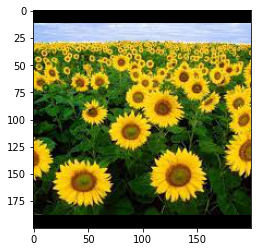

In [6]:
# Crop the image
width, height = img.size
start = (width - 200)/2, (height - 200)/2
end = (width + 200)/2, (height + 200)/2
cropped_img = img.crop((*start, *end))
plt.imshow(cropped_img)
plt.show()

## Brightness Adjustment
Adjusting the brightness of an image can be useful in scenarios where lighting conditions vary. Here, we increase the brightness of the image by 50%.

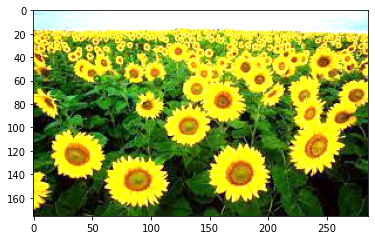

In [7]:
# Adjust brightness
from PIL import ImageEnhance
enhancer = ImageEnhance.Brightness(img)
brightened_img = enhancer.enhance(1.5)
plt.imshow(brightened_img)
plt.show()

The brightness of the image has been increased by 50%, making all colors more vivid.

## Color Inversion
Inverting the colors of an image (also known as a negative image) can sometimes help in emphasizing details. Here, we create a color inverted image.

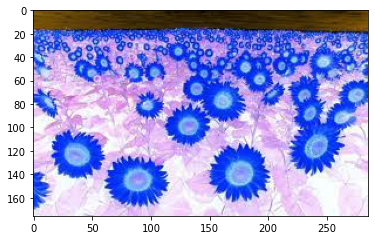

In [8]:
# Invert colors
inverted_img = ImageOps.invert(img)
plt.imshow(inverted_img)
plt.show()

The color inverted image swaps each color with its complementary color. This can be useful to highlight certain details that are less noticeable in the original image.

# Normalization

Normalization is a process that changes the range of pixel intensity values to a standard range, usually 0 to 1. This is a crucial step before training a neural network.

In [12]:
# Normalize image
np_img = np.array(img)

In [13]:
np_img

array([[[129, 167, 250],
        [128, 166, 249],
        [127, 165, 248],
        ...,
        [138, 174, 252],
        [135, 172, 252],
        [132, 170, 251]],

       [[127, 165, 248],
        [127, 165, 248],
        [127, 165, 248],
        ...,
        [132, 168, 242],
        [129, 167, 242],
        [126, 165, 242]],

       [[128, 165, 246],
        [129, 166, 247],
        [130, 167, 248],
        ...,
        [146, 183, 251],
        [144, 181, 251],
        [141, 179, 250]],

       ...,

       [[ 25,  19,  29],
        [ 24,  19,  25],
        [ 23,  21,  22],
        ...,
        [  5,  19,   4],
        [  3,  15,   1],
        [  2,  14,   2]],

       [[ 16,  12,   1],
        [ 22,  20,   8],
        [ 26,  27,  13],
        ...,
        [  7,  21,   6],
        [  2,  14,   0],
        [  0,  11,   0]],

       [[ 14,  13,   0],
        [ 17,  15,   0],
        [ 20,  20,   0],
        ...,
        [  8,  22,   7],
        [  1,  13,   0],
        [  0,   9,   0]]

In [15]:
normalized_img = np_img / 255.0

In [16]:
normalized_img

array([[[0.50588235, 0.65490196, 0.98039216],
        [0.50196078, 0.65098039, 0.97647059],
        [0.49803922, 0.64705882, 0.97254902],
        ...,
        [0.54117647, 0.68235294, 0.98823529],
        [0.52941176, 0.6745098 , 0.98823529],
        [0.51764706, 0.66666667, 0.98431373]],

       [[0.49803922, 0.64705882, 0.97254902],
        [0.49803922, 0.64705882, 0.97254902],
        [0.49803922, 0.64705882, 0.97254902],
        ...,
        [0.51764706, 0.65882353, 0.94901961],
        [0.50588235, 0.65490196, 0.94901961],
        [0.49411765, 0.64705882, 0.94901961]],

       [[0.50196078, 0.64705882, 0.96470588],
        [0.50588235, 0.65098039, 0.96862745],
        [0.50980392, 0.65490196, 0.97254902],
        ...,
        [0.57254902, 0.71764706, 0.98431373],
        [0.56470588, 0.70980392, 0.98431373],
        [0.55294118, 0.70196078, 0.98039216]],

       ...,

       [[0.09803922, 0.0745098 , 0.11372549],
        [0.09411765, 0.0745098 , 0.09803922],
        [0.09019608, 0

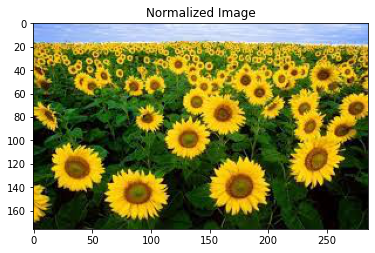

In [17]:
plt.imshow(normalized_img)
plt.title('Normalized Image')
plt.show()

# Gaussian Noise

Injecting random noise into your images can help to make your model more robust. Here, we will add Gaussian noise to the image. Gaussian noise is statistical noise having a probability density function equal to the normal distribution (also known as Gaussian distribution).

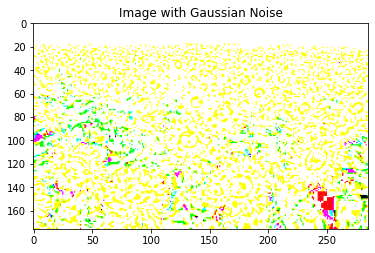

In [21]:
# Add Gaussian noise
noise = np.random.normal(loc=0.0, scale=0.1, size=np_img.shape)
noisy_img = np_img + noise
noisy_img_clipped = np.clip(noisy_img, 0., 1.)  # We need to clip values to the valid range for images (0-1)
plt.imshow(noisy_img_clipped)
plt.title('Image with Gaussian Noise')
plt.show()